In [1]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import dateutil

In [174]:
# science-fiction users
sf_users = pd.read_csv(os.path.join("data","scifi.stackexchange.com", "Users.csv"))
w_users = pd.read_csv(os.path.join("data","writers.stackexchange.com", "Users.csv"))
m_users = pd.read_csv(os.path.join("data","movies.stackexchange.com", "Users.csv"))

In [175]:
sf_users.head()

,Unnamed: 0,AboutMe,AccountId,CreationDate,DisplayName,DownVotes,Id,LastAccessDate,Location,ProfileImageUrl,Reputation,UpVotes,Views,WebsiteUrl
0,0,"<p>Hi, I'm not really a person.</p>\r\n\r\n<p>...",-1.0,2011-01-11T19:19:36.483,Community,15607,-1,2011-01-11T19:19:36.483,on the server farm,NaN,1,22476,0,http://meta.stackexchange.com/
1,1,<p>Developer on the Stack Overflow team. Find...,2.0,2011-01-11T19:50:40.620,Geoff Dalgas,0,2,2017-10-18T04:57:25.120,"Corvallis, OR",https://i.stack.imgur.com/nDllk.png,101,1,53,http://stackoverflow.com
2,2,<p>I am the Architecture Lead for Stack Overfl...,7598.0,2011-01-11T19:55:41.460,Nick Craver,0,3,2018-11-23T01:52:18.210,"Winston-Salem, NC",https://i.stack.imgur.com/nGCYr.jpg?s=128&g=1,101,4,29,https://nickcraver.com/blog/
3,3,"<p>co-founder of <a href=""https://airtable.com...",1998.0,2011-01-11T20:17:01.887,Emmett,0,4,2013-05-06T20:52:29.970,"San Francisco, CA",https://i.stack.imgur.com/d1oHX.jpg?s=128&g=1,101,0,26,http://minesweeperonline.com
4,4,"<p><a href=""http://blog.stackoverflow.com/2010...",29738.0,2011-01-11T20:18:52.493,Kevin Montrose,0,5,2018-07-11T16:01:10.277,"New York, NY, United States",NaN,101,43,28,http://kevinmontrose.com/


In [176]:
sf_users.loc[:,"CreationDate"] = [datetime.strptime(x[0:10], '%Y-%m-%d').strftime('%Y-%m')
                                  for x in sf_users.loc[:,"CreationDate"]]

w_users.loc[:,"CreationDate"] = [datetime.strptime(x[0:10], '%Y-%m-%d').strftime('%Y-%m')
                                  for x in w_users.loc[:,"CreationDate"]]

m_users.loc[:,"CreationDate"] = [datetime.strptime(x[0:10], '%Y-%m-%d').strftime('%Y-%m')
                                  for x in m_users.loc[:,"CreationDate"]]

# sf_users.CreationDate = sf_users.CreationDate.apply(dateutil.parser.parse, dayfirst=True)
# w_users.CreationDate = w_users.CreationDate.apply(dateutil.parser.parse, dayfirst=True)
# m_users.CreationDate = m_users.CreationDate.apply(dateutil.parser.parse, dayfirst=True)

# sf_users.loc[:,"CreationDate"] = sf_users.CreationDate.dt.to_period('M')
# w_users.loc[:,"CreationDate"] = w_users.CreationDate.dt.to_period('M')
# m_users.loc[:,"CreationDate"] = m_users.CreationDate.dt.to_period('M')


In [177]:
# users.head()

In [178]:
sf_users_in_time = sf_users.groupby("CreationDate").size()
sf_users_in_time = sf_users_in_time[:-1]

w_users_in_time = w_users.groupby("CreationDate").size()
w_users_in_time = w_users_in_time[:-1]

m_users_in_time = m_users.groupby("CreationDate").size()
m_users_in_time = m_users_in_time[:-1]

### Ilość nowych użytkowników w poszczególnych miesiącach

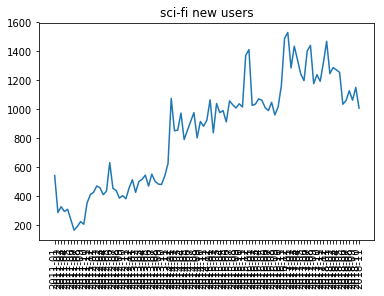

In [215]:
# sf_users_in_time.index = [x.to_timestamp().strftime("%Y-%m-%d") for x in sf_users_in_time.index]

plt.plot(sf_users_in_time)
plt.xticks(rotation='vertical')
plt.title("sci-fi new users")
plt.show()

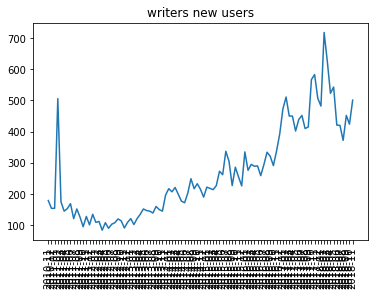

In [216]:
plt.plot(w_users_in_time)
plt.xticks(rotation='vertical')
plt.title("writers new users")
plt.show()

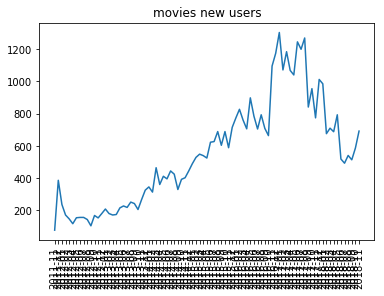

In [217]:
plt.plot(m_users_in_time)
plt.xticks(rotation='vertical')
plt.title("movies new users")
plt.show()

In [186]:
len(sf_users_in_time.index), len(w_users_in_time.index), len(m_users_in_time.index)

(95, 97, 85)

### Ilość użytkowników stacka (w sumie) w poszczególnych miesiącach

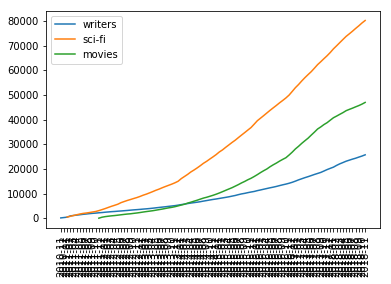

In [214]:

plt.plot(w_users_in_time.index, w_users_in_time.cumsum().values, label = "writers")
plt.plot(sf_users_in_time.index, sf_users_in_time.cumsum().values, label = "sci-fi")
plt.plot(m_users_in_time.index, m_users_in_time.cumsum().values, label = "movies")
plt.legend()

plt.xticks(rotation='vertical')
plt.show()